In [34]:
import cv2
import numpy as np
import requests
from PIL import Image

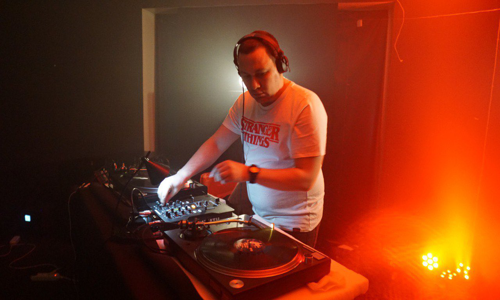

In [35]:
# Reading image from url

image = Image.open(requests.get('https://pbs.twimg.com/media/FMRqKAoWYAIyAbD?format=jpg&name=large', stream=True).raw)
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

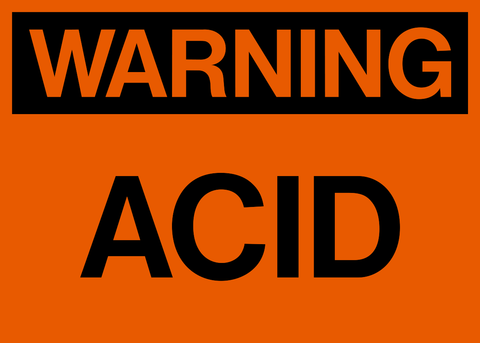

In [43]:
# Reading logo from url

logo = Image.open(requests.get('https://cdn.shopify.com/s/files/1/1456/4892/products/WAR-20_Acid_large.png?v=1500047632', stream=True).raw)
logo

In [37]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [38]:
# Get the center of the original. It's the location where we will place the watermark

center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [44]:
# Get ROI

roi = image_logow[top_y: bottom_y, left_x: right_x]

# Add the Logo to the Roi

result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Drawing

cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

# Replace the ROI on the image

image_logow[top_y: bottom_y, left_x: right_x] = result

TypeError: ignored

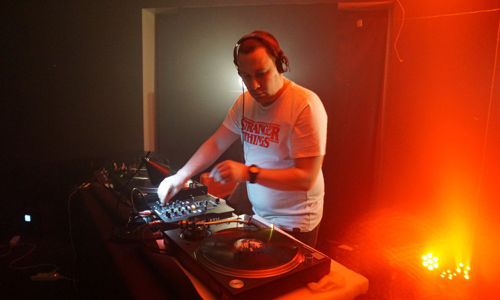

In [40]:
# Plogting log watermark image

img = Image.fromarray(image_logow, 'RGB')
img

In [41]:
# Text Watermark

image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text="Warning Acid", org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0, 0, 255), thickness=2, lineType=cv2.LINE_4);

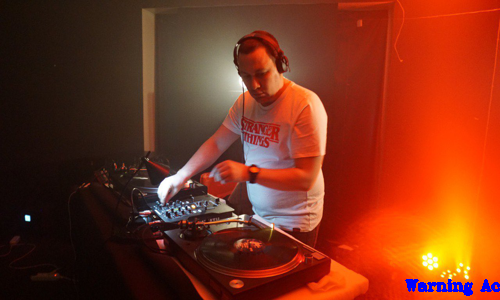

In [42]:
# Plotting text watermark image

timg = Image.fromarray(image_text, 'RGB')
timg